In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("./Resources/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
df.keys()

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values.
X = df.drop('koi_disposition', axis=1)
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


y: koi_disposition X: koi_score, koi_period (orbital period), koi_impact, koi_duration(transit duration), koi_depth, koi_prad, koi_teq,

# Create a Train Test Split

Use koi_disposition for the y values

In [7]:
y = df['koi_disposition']
target_names = ["confirmed","false positive"]
y

0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
4130,1,0,1,0,3.435251,0.000049,-0.000049,132.63330,0.01170,-0.01170,...,-79,4.014,0.202,-0.081,1.742,0.267,-0.400,290.38721,37.478180,14.603
1188,0,0,0,0,89.193574,0.000230,-0.000230,217.82184,0.00204,-0.00204,...,-134,4.239,0.143,-0.117,1.295,0.232,-0.211,294.74332,43.461208,12.487
1566,0,0,0,0,19.005410,0.000060,-0.000060,144.15574,0.00266,-0.00266,...,-220,4.423,0.067,-0.202,1.036,0.333,-0.133,293.66885,46.379250,14.839
2999,0,0,0,0,16.336886,0.000168,-0.000168,132.20816,0.00723,-0.00723,...,-371,4.490,0.094,-0.175,0.859,0.235,-0.126,293.13098,38.159679,15.050
292,0,0,0,0,12.992049,0.000052,-0.000052,136.32016,0.00294,-0.00294,...,-116,4.236,0.168,-0.112,1.242,0.188,-0.209,291.42358,38.216591,13.974


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled,y_train)
    test_score = knn.score(X_test_scaled,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k:{k} Training score/Test score: {train_score}/{test_score}")

k:1 Training score/Test score: 1.0/0.8237986270022883
k:3 Training score/Test score: 0.9101659355330918/0.8335240274599542
k:5 Training score/Test score: 0.8874690062941064/0.8369565217391305
k:7 Training score/Test score: 0.8777417509059698/0.8306636155606407
k:9 Training score/Test score: 0.8689681480068663/0.8352402745995423
k:11 Training score/Test score: 0.8683959565134465/0.8335240274599542
k:13 Training score/Test score: 0.8630555025748617/0.8346681922196796
k:15 Training score/Test score: 0.8613389280946023/0.8421052631578947
k:17 Training score/Test score: 0.8565706656494373/0.8375286041189931
k:19 Training score/Test score: 0.8533282471867252/0.8335240274599542


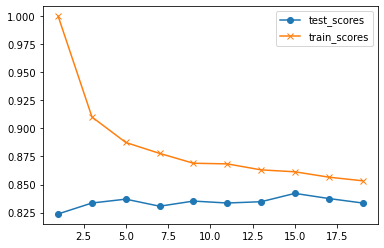

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1,20,2), test_scores,marker="o",label="test_scores")
plt.plot(range(1,20,2),train_scores,marker="x",label="train_scores")
plt.legend(loc="upper right")
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.831


In [14]:
predictions = knn.predict(X_test_scaled)

In [15]:
import numpy as np
y_test = np.array(y_test)

for x in range(0,5,1):
    print(f"Predictions: {predictions[x]}, Actual: {y_test[x]}")

Predictions: FALSE POSITIVE, Actual: FALSE POSITIVE
Predictions: CONFIRMED, Actual: CANDIDATE
Predictions: CANDIDATE, Actual: CANDIDATE
Predictions: FALSE POSITIVE, Actual: FALSE POSITIVE
Predictions: FALSE POSITIVE, Actual: FALSE POSITIVE


In [16]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.8777417509059698
Testing Data Score: 0.8306636155606407


# Hyperparameter Tuning

Use GridSearchCV to tune the model's parameters

In [17]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': np.arange(1,20,2)
}
grid_knn = GridSearchCV(knn,param_grid)

In [18]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [19]:
# Train the model with GridSearch
grid_knn.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])})

In [20]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)
print(grid_knn.best_estimator_)

{'n_neighbors': 15}
0.8313919472562018
KNeighborsClassifier(n_neighbors=15)


# Save the Model

In [21]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'best_models/knn.sav'
joblib.dump(grid_knn, filename)

['best_models/knn.sav']